In [1]:
!pip install mplcyberpunk

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import mplcyberpunk

plt.style.use("cyberpunk")

# Downloading the dataset

In [7]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [9]:
df.head(7)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
5,190,3.0,NaN,2484.883986,14.7,2008,Europe,Gasoline,All-wheel drive,-1.0,17.271818
6,240,7.0,127.0,3006.542287,22.2,2012,USA,Gasoline,Front-wheel drive,1.0,13.210412


In [11]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

Preparing the dataset
Use only the following columns:

'engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg'

In [13]:
df_selected = df[['engine_displacement',
                  'horsepower',
                  'vehicle_weight',
                  'model_year',
                  'fuel_efficiency_mpg']]

print(df_selected.head())

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


EDA
Look at the fuel_efficiency_mpg variable. Does it have a long tail?

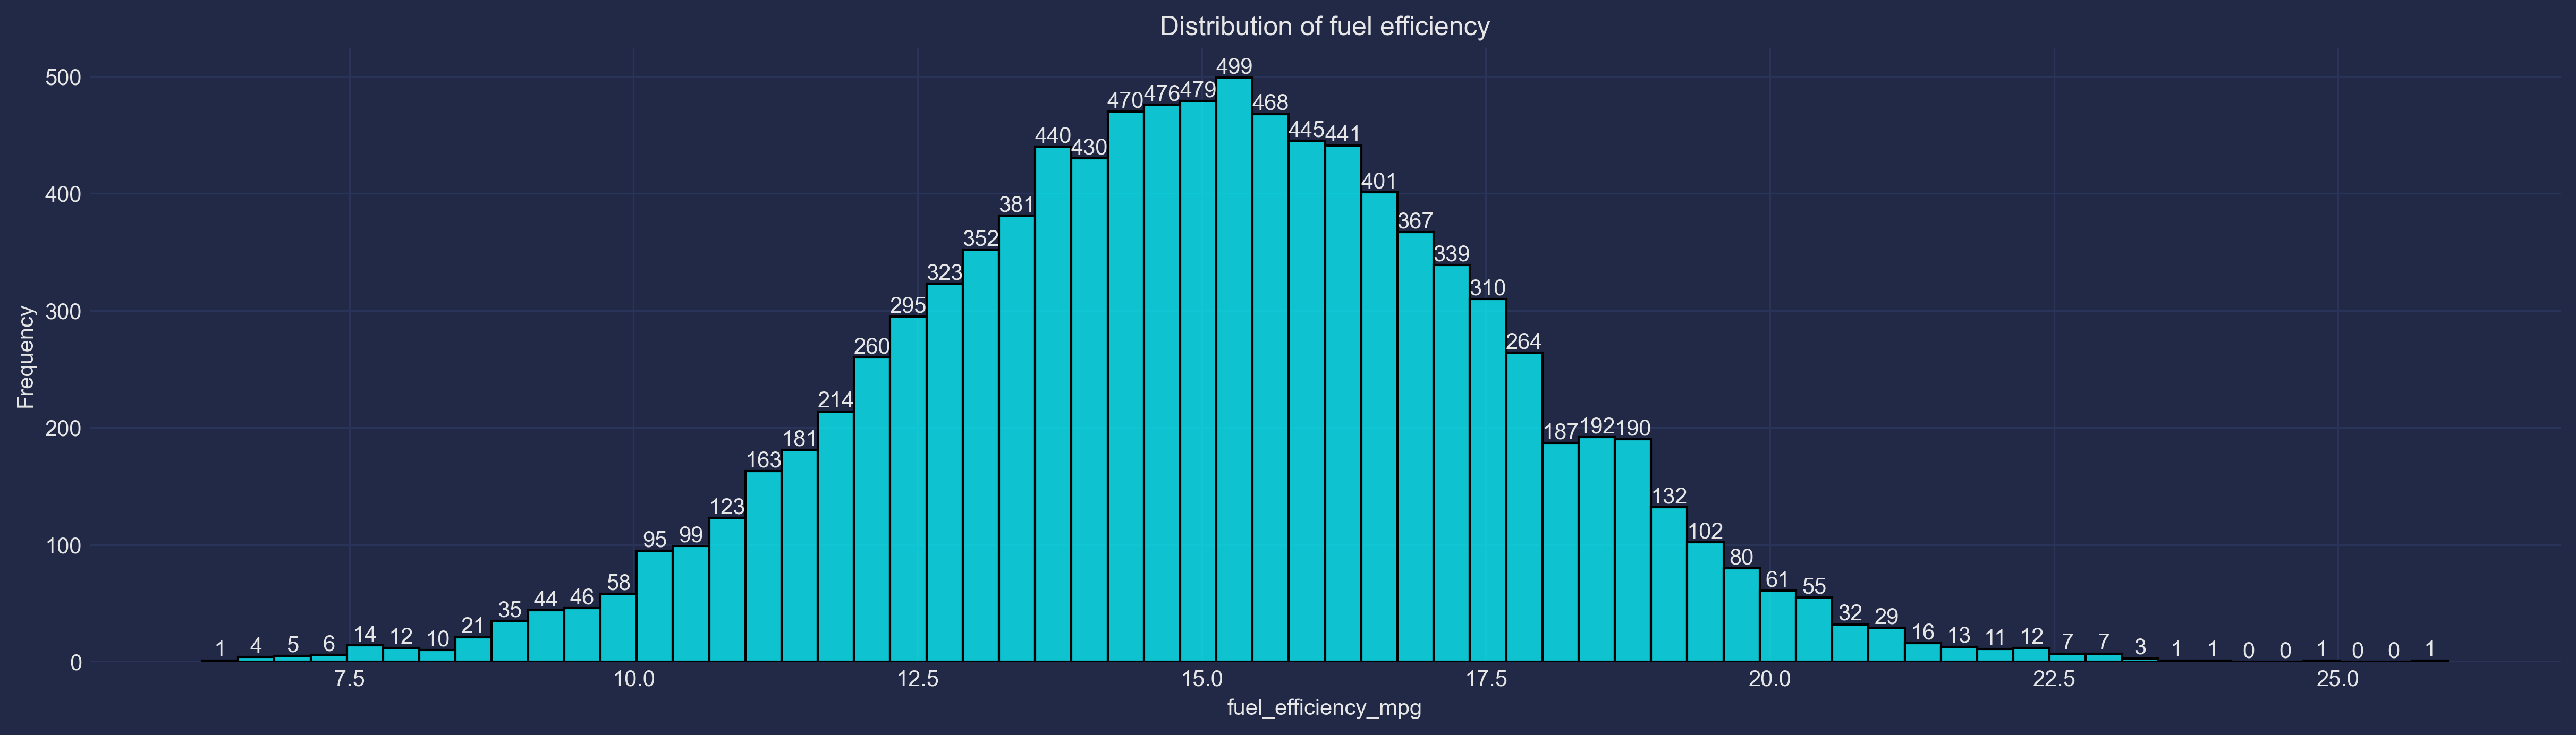

In [17]:
plt.figure(figsize=(20, 5), dpi=300)
y = sns.histplot(df.fuel_efficiency_mpg)
y.bar_label(y.containers[0], labels=y.containers[0].datavalues)
plt.title("Distribution of fuel efficiency")
plt.xlabel("fuel_efficiency_mpg")
plt.ylabel("Frequency");

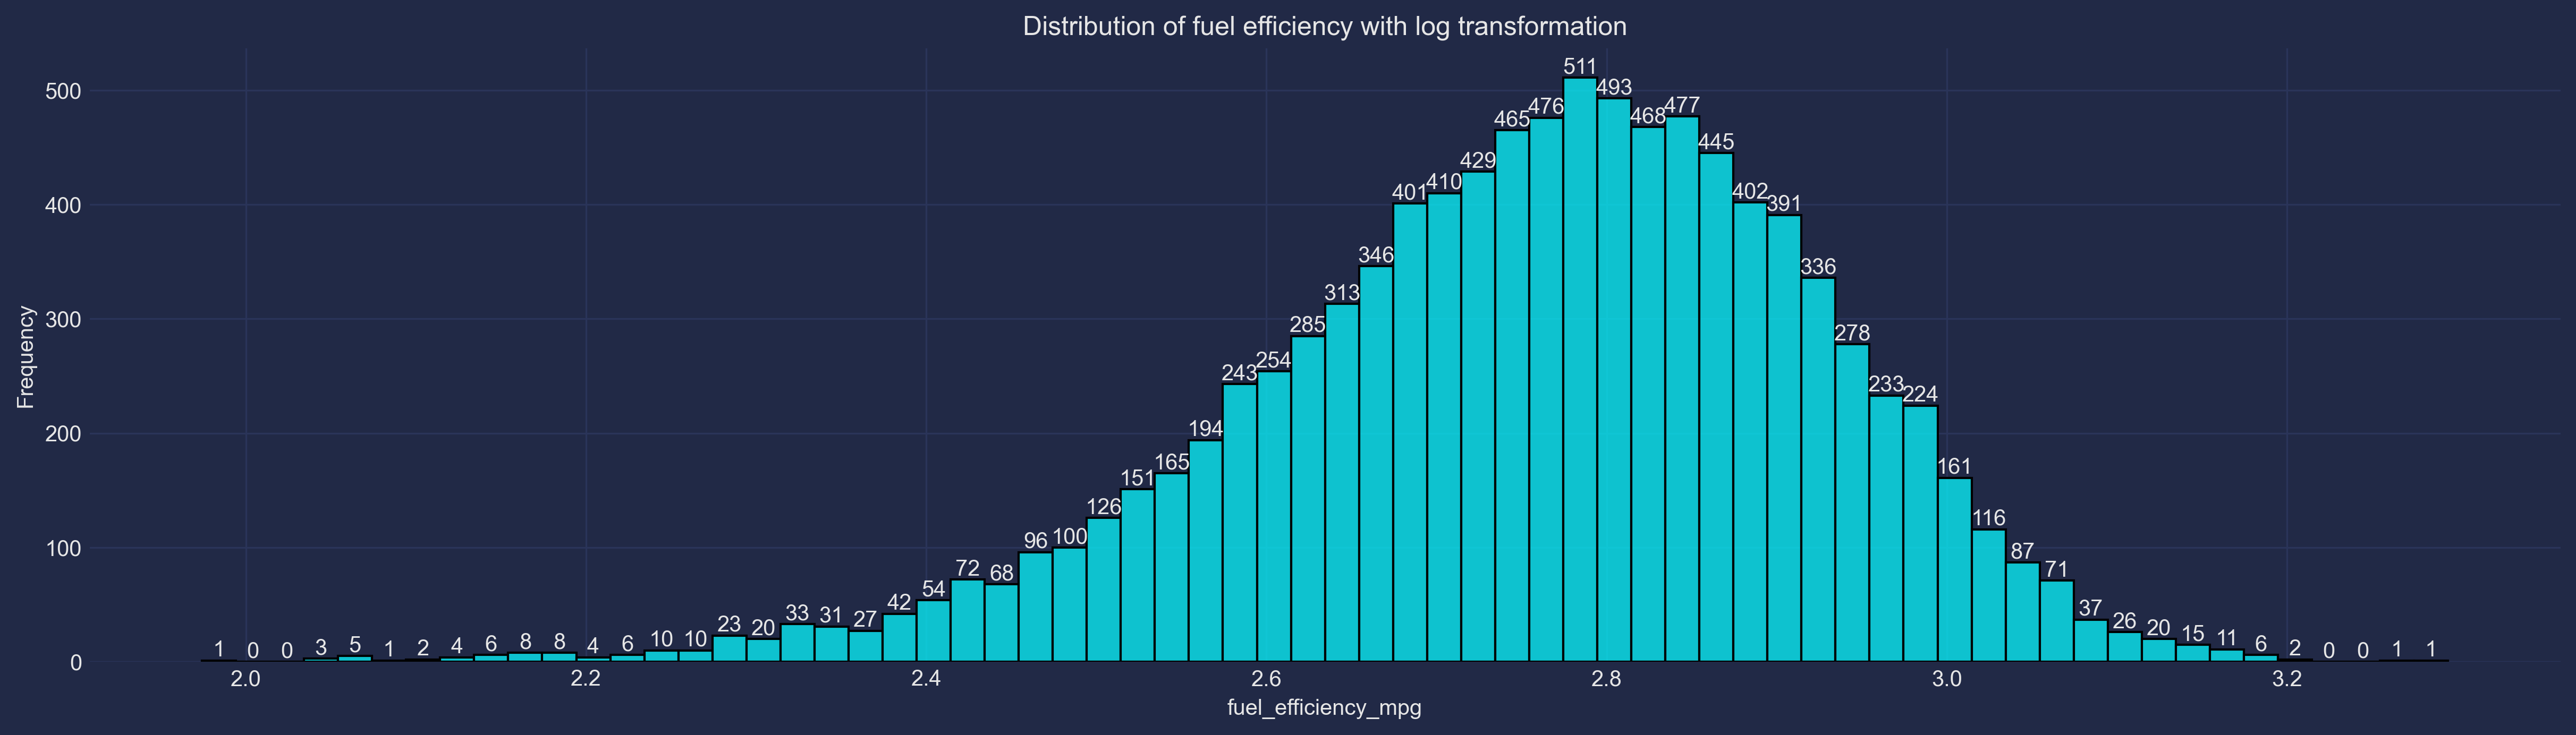

In [27]:
df["fuel_efficiency_mpg"] = np.log1p(df.fuel_efficiency_mpg)

plt.figure(figsize=(20, 5), dpi=300)
y = sns.histplot(df.fuel_efficiency_mpg)
y.bar_label(y.containers[0], labels=y.containers[0].datavalues)
plt.title("Distribution of fuel efficiency with log transformation")
plt.xlabel("fuel_efficiency_mpg")
plt.ylabel("Frequency");

Question 1
There's one column with missing values. What is it?

'engine_displacement'
'horsepower'
'vehicle_weight'
'model_year'

In [19]:
print(df.isnull().sum())

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64


What's the median (50% percentile) for variable 'horsepower'?

49
99
149
199

In [21]:
print(f"Median  value of horsepower:  {df.horsepower.median()}")

Median  value of horsepower:  149.0


Prepare and split the dataset
Shuffle the dataset (the filtered one you created above), use seed 42.
Split your data in train/val/test sets, with 60%/20%/20% distribution.
Use the same code as in the lectures

In [33]:
def split_dataset(df, seed=42):
    np.random.seed(seed) # Setting for reproducibility

    n = len(df)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df.iloc[idx].copy()

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    return df_train, df_val, df_test

n = len(df_selected)
df_train, df_val, df_test = split_dataset(df_selected)

print(f"""The training set represent {len(df_train)*100/n}%.
The validation set represent {len(df_val)*100/n}%.
The testing set represent {len(df_test)*100/n}%.""")

The training set represent 60.01648804616653%.
The validation set represent 19.991755976916735%.
The testing set represent 19.991755976916735%.


Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

Filling the missing values

In [37]:
def fill_na(df_train, df_val, df_test, value=None):
    df_train = df_train.fillna(value)
    df_val = df_val.fillna(value)
    df_test = df_test.fillna(value)
    return df_train, df_val, df_test

df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=df_train.horsepower.mean())

Extracting X and y matrix

In [41]:
def extract_X_y(df_train, df_val, df_test, target='fuel_efficiency_mpg'):
    X_train = df_train.drop([target], axis=1).values
    y_train = df_train[target].values

    X_val = df_val.drop([target], axis=1).values
    y_val = df_val[target].values

    X_test = df_test.drop([target], axis=1).values
    y_test = df_test[target].values

    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test, target='fuel_efficiency_mpg')

Linear Regression

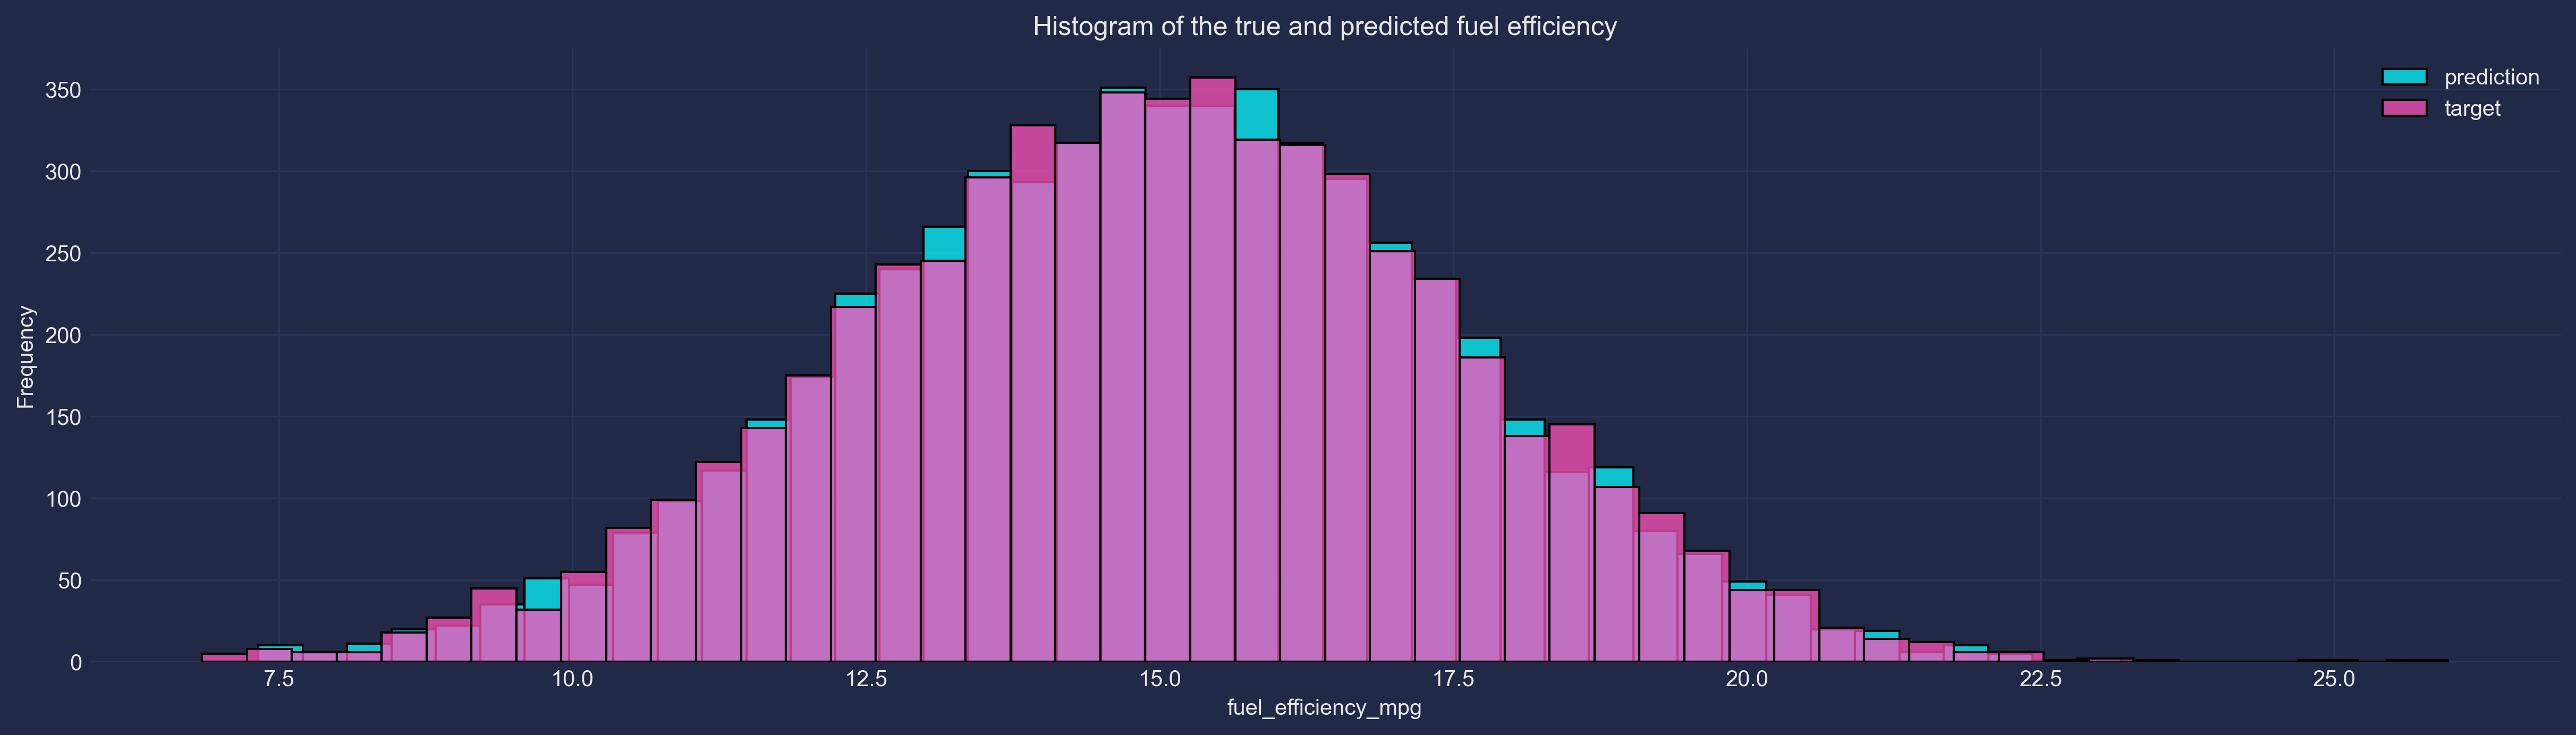

In [45]:
def linear_regression(X, w):
    return w[0] + X.dot(w[1:])

def calculate_weigths(X, y):
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   C = X.T.dot(X)
   C_inv = np.linalg.inv(C)
   w = C_inv.dot(X.T).dot(y)

   return w

class LinearRegressor():
    def __init__(self):
        self.w = 0

    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        C = X.T.dot(X)
        C_inv = np.linalg.inv(C)
        self.w = C_inv.dot(X.T).dot(y)
        return

    def predict(self, X):
        return self.w[0] + X.dot(self.w[1:])

lr = LinearRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("fuel_efficiency_mpg")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted fuel efficiency")
plt.legend();

In [47]:
def RMSE(y, y_pred):
    error = y_pred - y
    mse = (error**2).mean()
    return np.sqrt(mse)

y_pred = lr.predict(X_val)
rmse_fillna_mean = round(RMSE(y_val, y_pred), 2)
rmse_fillna_mean

0.46

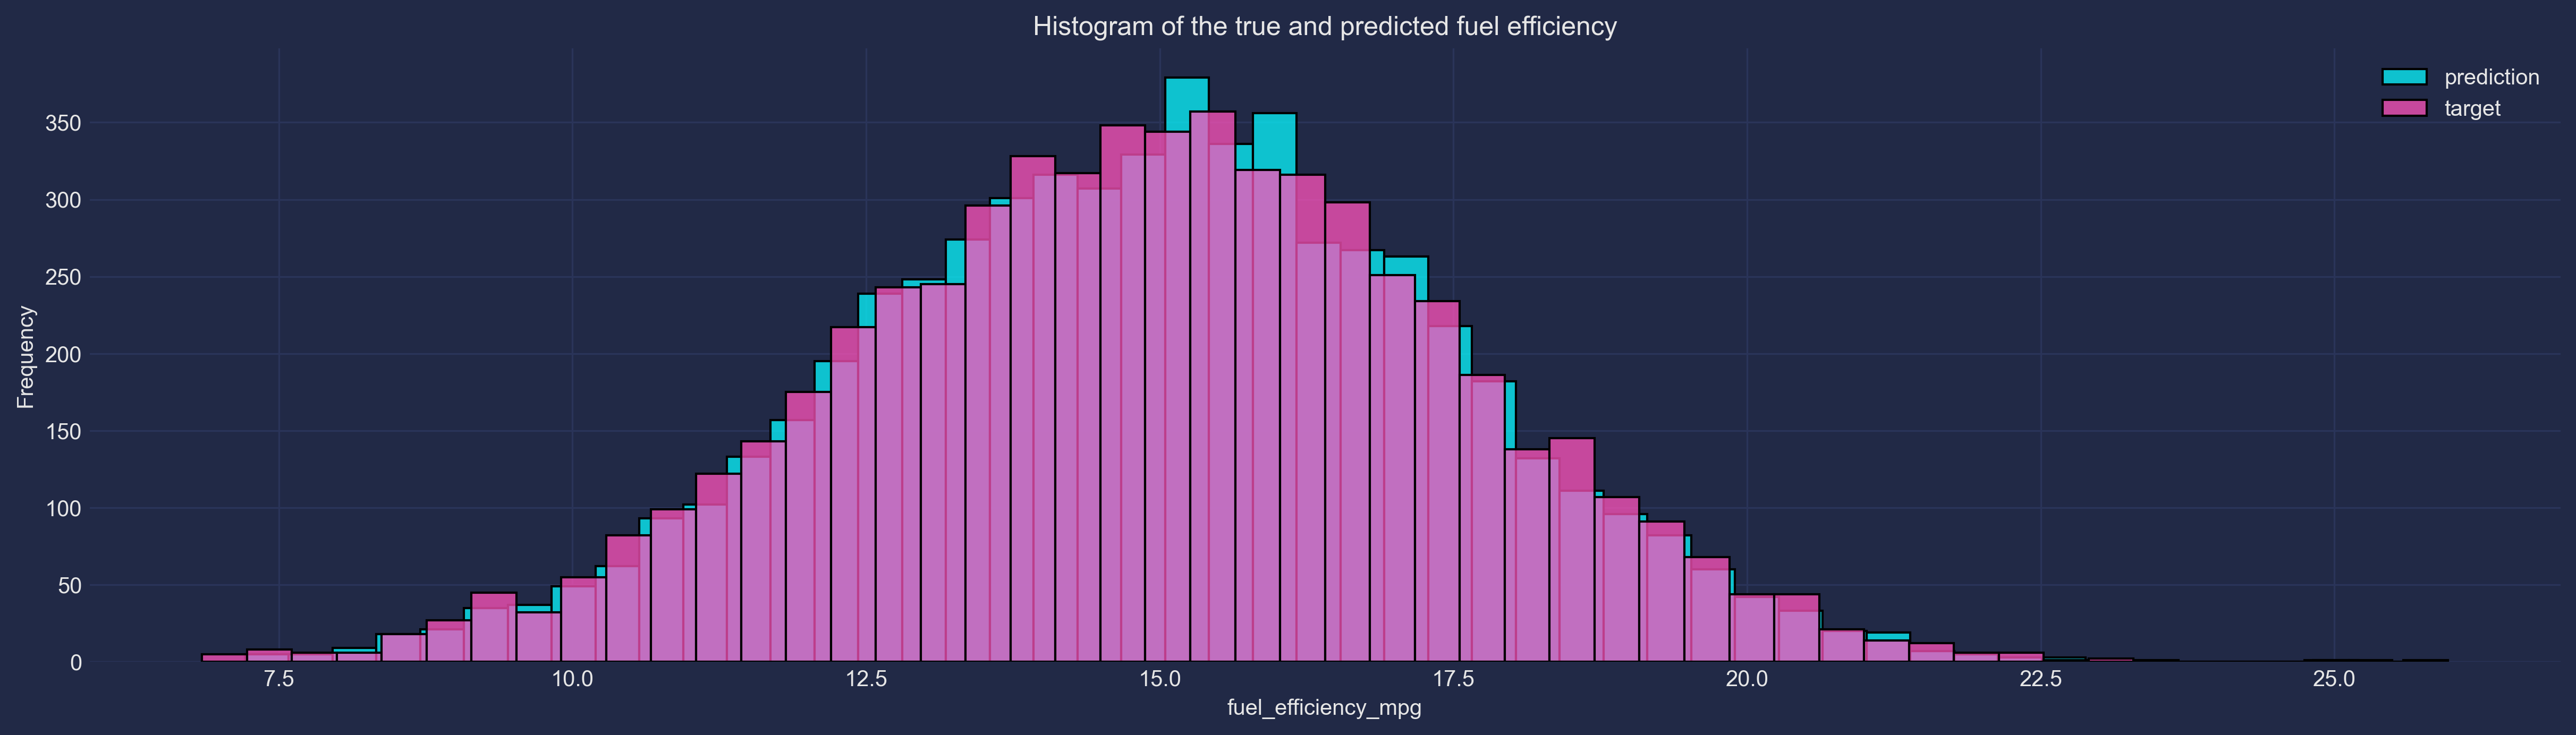

In [53]:
df_train, df_val, df_test = split_dataset(df_selected)
df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test, target='fuel_efficiency_mpg')

lr = LinearRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_train)

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("fuel_efficiency_mpg")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted fuel efficiency")
plt.legend();

In [55]:
y_pred = lr.predict(X_val)
rmse_fillna_zero = round(RMSE(y_val, y_pred), 2)
rmse_fillna_zero

0.52

In [57]:
print(f"RMSE with NA values filled with zero is {rmse_fillna_zero}.\nRMSE with NA values filled with the mean is {rmse_fillna_mean}.")

RMSE with NA values filled with zero is 0.52.
RMSE with NA values filled with the mean is 0.46.


regularization
lest r.

In [59]:
def calculate_weigths(X, y, r=0.0):
   ones = np.ones(X.shape[0])
   X = np.column_stack([ones, X])

   C = X.T.dot(X)
   reg = r * np.eye(C.shape[0])
   C_inv = np.linalg.inv(C + reg)
   w = C_inv.dot(X.T).dot(y)

   return w

class LinearRegressor():
    def __init__(self, r=0):
        self.w = 0
        self.r = r

    def fit(self, X, y):
        ones = np.ones(X.shape[0])
        X = np.column_stack([ones, X])

        C = X.T.dot(X)
        reg = self.r * np.eye(C.shape[0])
        C_inv = np.linalg.inv(C + reg)
        self.w = C_inv.dot(X.T).dot(y)
        return

    def predict(self, X):
        return self.w[0] + X.dot(self.w[1:])

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

In [61]:
r = [0, 0.01, 0.1, 1, 10, 100]
for ri in r:
    lr = LinearRegressor(r=ri)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    print(f"For r={ri} -> RMSE={round(RMSE(y_val, y_pred), 2)}")

For r=0 -> RMSE=0.52
For r=0.01 -> RMSE=0.52
For r=0.1 -> RMSE=0.52
For r=1 -> RMSE=0.52
For r=10 -> RMSE=0.52
For r=100 -> RMSE=0.52


Showing the regularization of RMSE

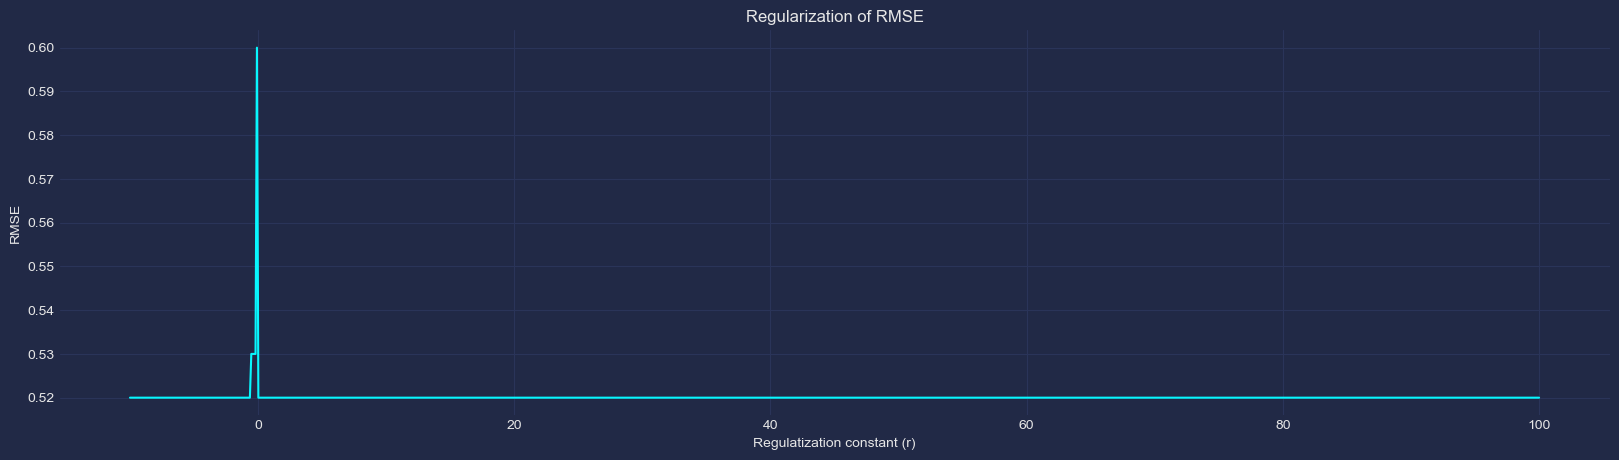

In [63]:
r = np.linspace(-10, 100, 1000)
rmse = []
for ri in r:
    lr = LinearRegressor(r=ri)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)

    rmse.append(round(RMSE(y_val, y_pred), 2))

plt.figure(figsize=(20, 5))
sns.lineplot(x=r, y=rmse)
plt.xlabel('Regulatization constant (r)')
plt.ylabel('RMSE')
plt.title('Regularization of RMSE');

The histogram for the optimal regularization value

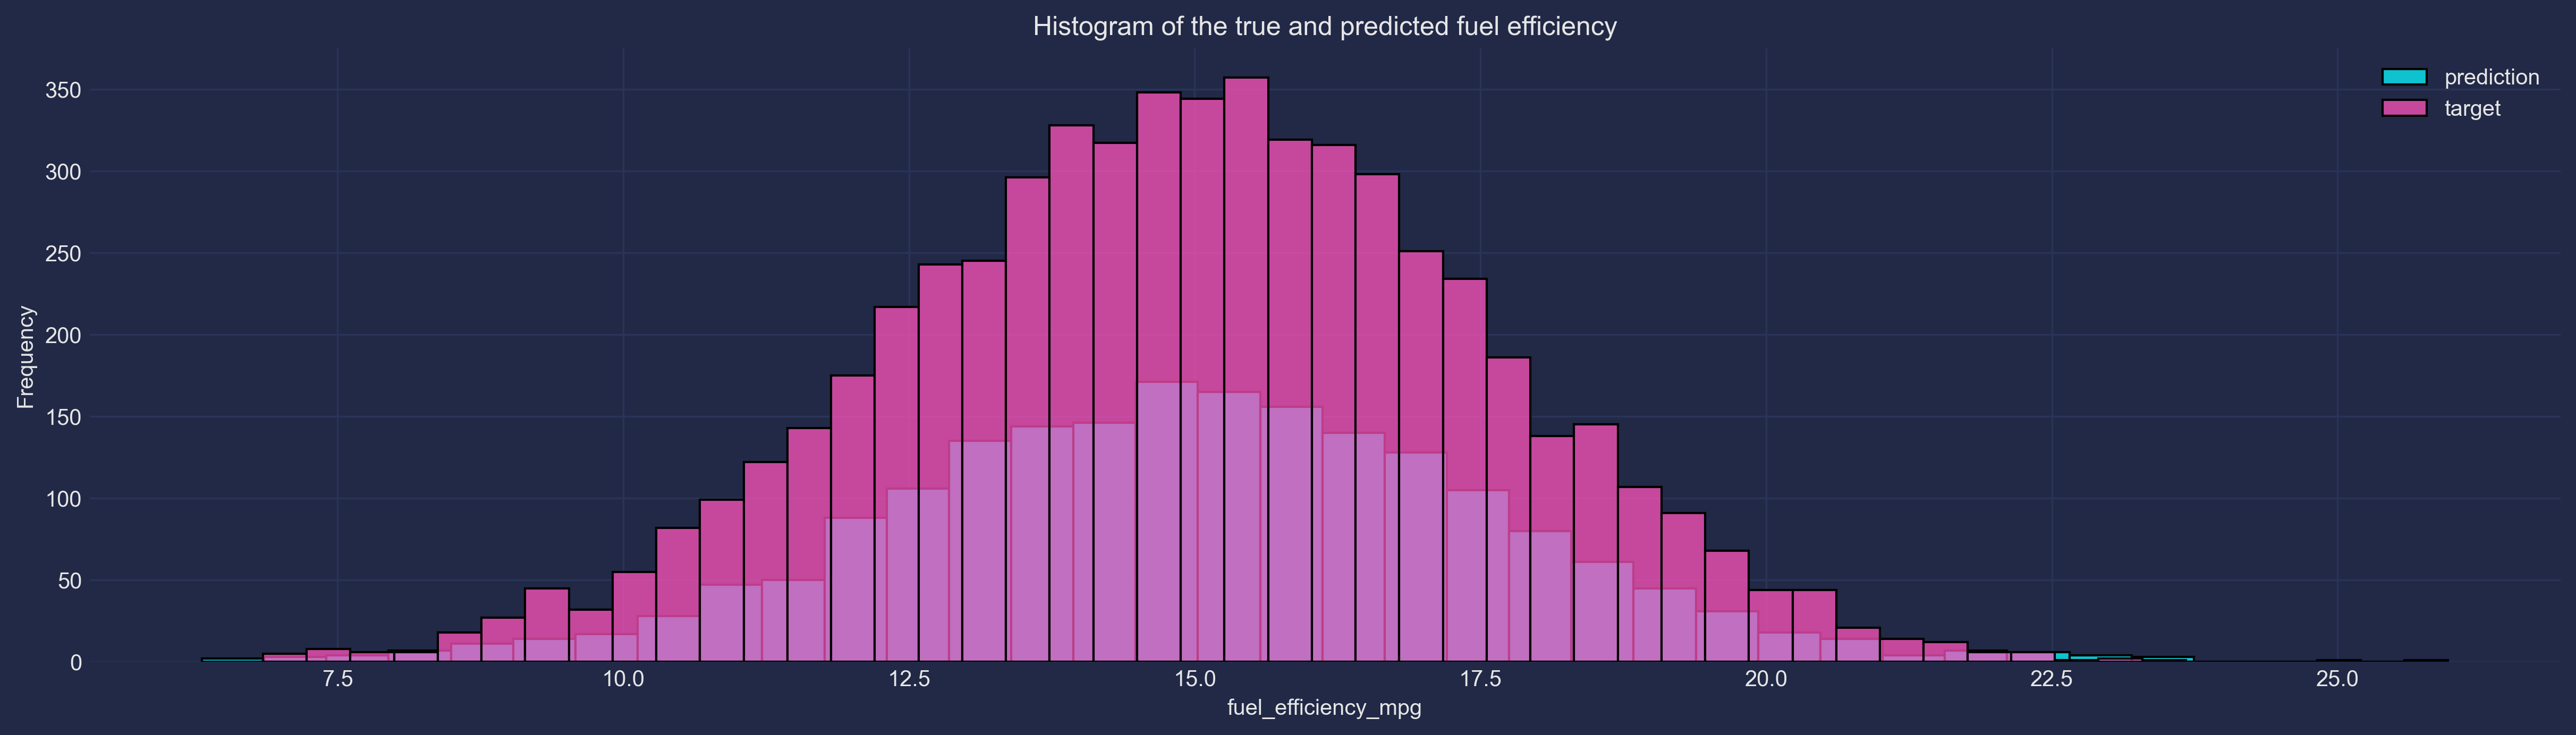

In [65]:
lr = LinearRegressor(r=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
rmse.append(round(RMSE(y_val, y_pred), 2))

plt.figure(figsize=(20, 5), dpi=300)
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.xlabel("fuel_efficiency_mpg")
plt.ylabel("Frequency")
plt.title("Histogram of the true and predicted fuel efficiency")
plt.legend();

In [67]:
y_pred = lr.predict(X_val)
rmse_fillna_zero = round(RMSE(y_val, y_pred), 2)
rmse_fillna_zero

0.52

Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
What's the value of std?

In [73]:
seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse = []

for seed_i in seed:
    df_train, df_val, df_test = split_dataset(df_selected, seed_i)
    df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
    X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test, target='fuel_efficiency_mpg')

    lr = LinearRegressor()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    rmse.append(RMSE(y_val, y_pred))

round(np.std(rmse), 3)

0.007

Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?

In [77]:
df_train, df_val, df_test = split_dataset(df_selected, seed=9)
df_train = pd.concat([df_train, df_val])
df_train, df_val, df_test = fill_na(df_train, df_val, df_test, value=0)
X_train, y_train, X_val, y_val, X_test, y_test = extract_X_y(df_train, df_val, df_test, target='fuel_efficiency_mpg')

lr = LinearRegressor(r=0.001)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
round(RMSE(y_test, y_pred), 2)

0.52